**Importing the Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

**Load the Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Explore the Data**

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

**Visualize Sample Images**

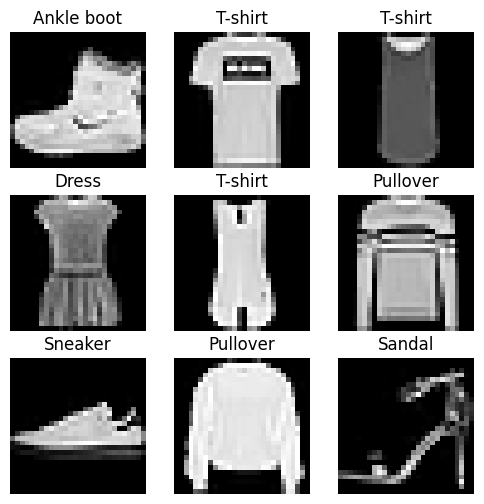

In [4]:
class_names = [
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

**Normalize Data**

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build CNN Model**

In [6]:
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compile Model**

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Train Model**

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7421 - loss: 0.7233 - val_accuracy: 0.8631 - val_loss: 0.3824
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.8679 - loss: 0.3619 - val_accuracy: 0.8825 - val_loss: 0.3231
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8927 - loss: 0.2967 - val_accuracy: 0.8857 - val_loss: 0.3109
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9024 - loss: 0.2654 - val_accuracy: 0.9038 - val_loss: 0.2676
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.9138 - loss: 0.2350 - val_accuracy: 0.9024 - val_loss: 0.2696


**Evaluate the Model**

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8994 - loss: 0.2778
Test Accuracy: 0.8995000123977661


**Visualize the Training Performance**

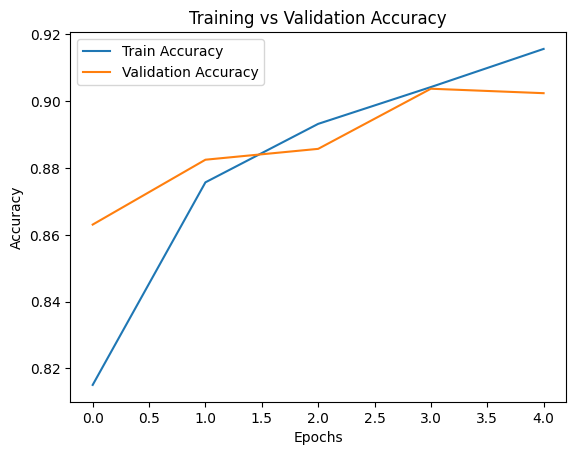

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

**Predict a Single Model**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


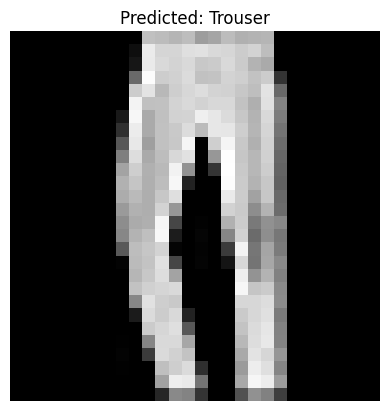

In [11]:
predictions = model.predict(X_test)

index = 5
plt.imshow(X_test[index], cmap='gray')
plt.title("Predicted: " + class_names[np.argmax(predictions[index])])
plt.axis('off')
plt.show()

**Save the Model**

In [15]:
model.save("fashion_cnn.keras")